In [57]:
import mysql.connector as conn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
myconn = conn.connect(host="localhost", user="root", passwd="root1234")

In [4]:
myconn

In [5]:
cursor = myconn.cursor()

In [6]:
cursor

In [7]:
result = cursor.execute("show databases")
cursor.fetchall()

[('assignment',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('student_result',),
 ('sys',),
 ('world',)]

In [8]:
query = "use student_result"
cursor.execute(query)

In [9]:
result = cursor.execute("show tables")
cursor.fetchall()

[('student_marks',)]

In [13]:
query = "select * from student_marks"
data = pd.read_sql_query(query,myconn)

In [14]:
data

,roll_no,first_name,last_name,subject1,subject2,subject3,subject4,sum_of_marks,percentage
0,1,Harry,Potter,66,66,66,66,264,66
1,2,Ron,Weasley,77,66,44,77,264,66
2,3,Hermione,Granger,99,99,99,99,396,99
3,4,Dean,Thomas,77,77,66,77,297,74
4,5,neville,longbottom,44,44,66,44,198,50
5,6,alicia,schmidt,32,55,66,44,197,49
6,7,parvati,patil,88,66,55,22,231,58
7,8,percy,weasley,22,55,66,44,187,47
8,9,filch,nanw,22,33,11,22,88,22
9,10,Draco,Malfoy,55,66,77,88,286,72


In [15]:
df = pd.DataFrame(data)

In [17]:
df.to_csv("student_data.csv", index = None)

In [25]:
df.shape

(10, 9)

In [26]:
df.head()

,roll_no,first_name,last_name,subject1,subject2,subject3,subject4,sum_of_marks,percentage
0,1,Harry,Potter,66,66,66,66,264,66
1,2,Ron,Weasley,77,66,44,77,264,66
2,3,Hermione,Granger,99,99,99,99,396,99
3,4,Dean,Thomas,77,77,66,77,297,74
4,5,neville,longbottom,44,44,66,44,198,50


In [27]:
df.tail()

,roll_no,first_name,last_name,subject1,subject2,subject3,subject4,sum_of_marks,percentage
5,6,alicia,schmidt,32,55,66,44,197,49
6,7,parvati,patil,88,66,55,22,231,58
7,8,percy,weasley,22,55,66,44,187,47
8,9,filch,nanw,22,33,11,22,88,22
9,10,Draco,Malfoy,55,66,77,88,286,72


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   roll_no       10 non-null     int64 
 1   first_name    10 non-null     object
 2   last_name     10 non-null     object
 3   subject1      10 non-null     int64 
 4   subject2      10 non-null     int64 
 5   subject3      10 non-null     int64 
 6   subject4      10 non-null     int64 
 7   sum_of_marks  10 non-null     int64 
 8   percentage    10 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 852.0+ bytes


In [29]:
df.dtypes[data.dtypes == 'int64']

roll_no         int64
subject1        int64
subject2        int64
subject3        int64
subject4        int64
sum_of_marks    int64
percentage      int64
dtype: object

In [30]:
df.dtypes[data.dtypes == 'O']

first_name    object
last_name     object
dtype: object

In [32]:
col_int = df.select_dtypes(include = "int").columns.tolist()
col_obj = df.select_dtypes(include = "O").columns.tolist()

In [36]:
print("col_int\n",col_int)
print("\ncol_obj\n",col_obj)

col_int
 ['roll_no', 'subject1', 'subject2', 'subject3', 'subject4', 'sum_of_marks', 'percentage']

col_obj
 ['first_name', 'last_name']


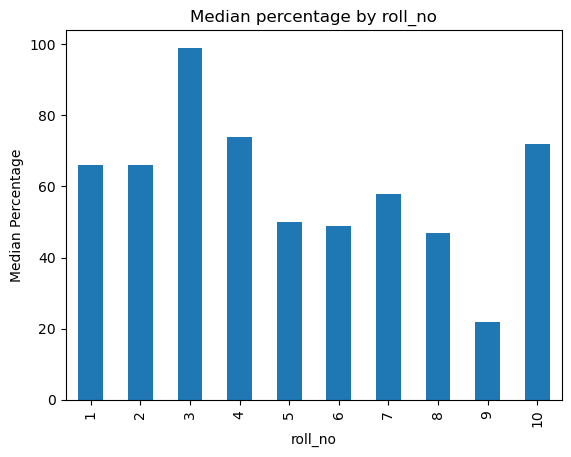

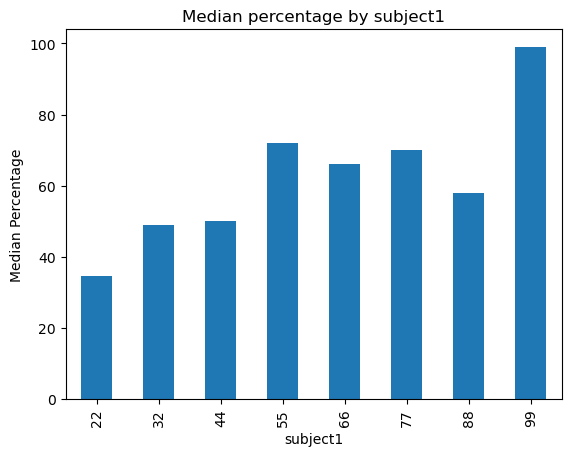

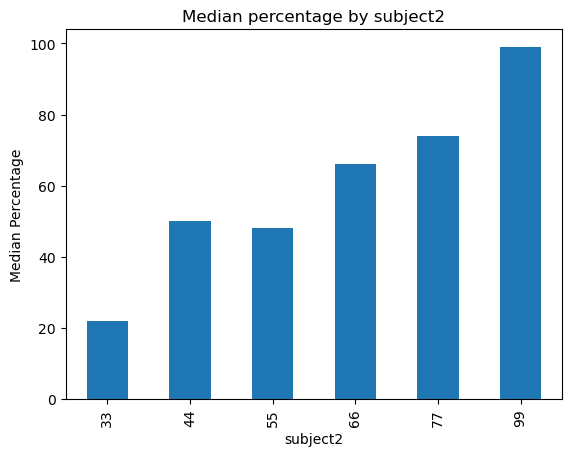

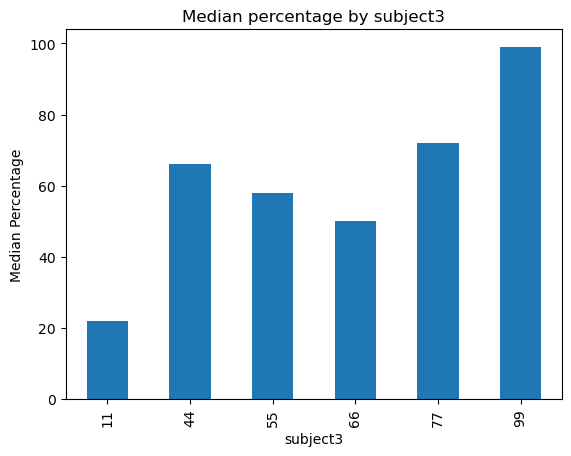

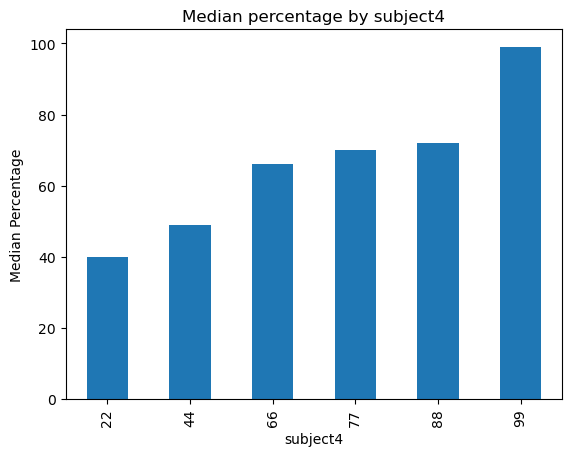

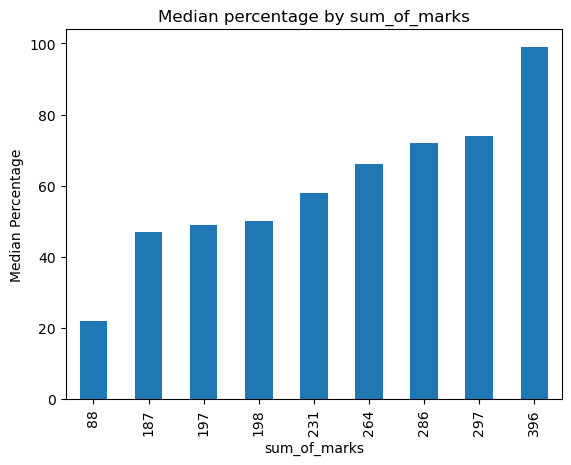

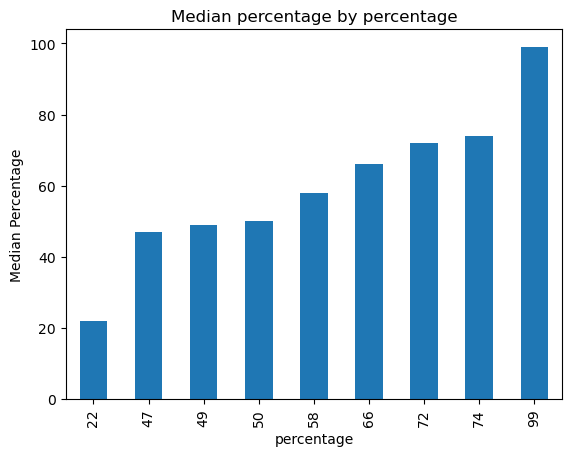

In [43]:
for feature in col_int:
    df.groupby(feature)['percentage'].median().plot.bar()
    plt.title(f'Median percentage by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median Percentage')
    plt.show()

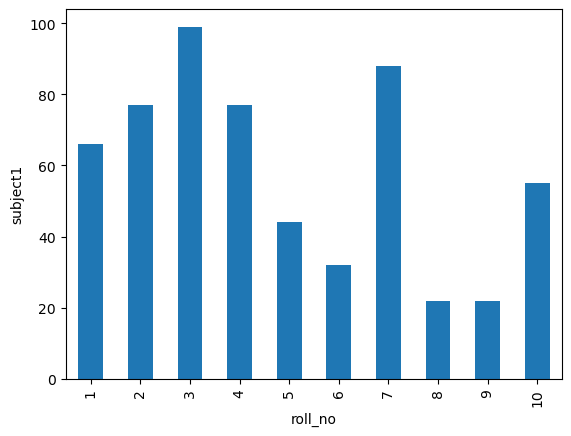

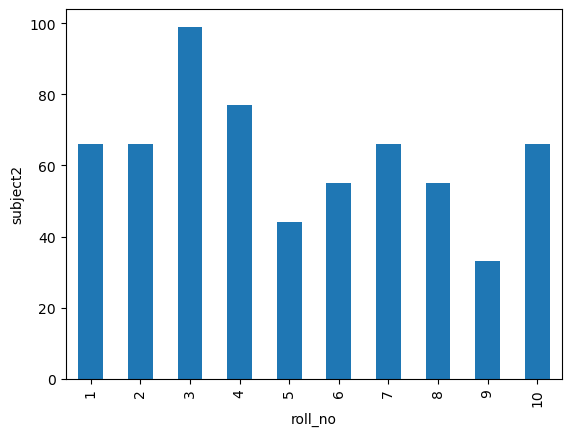

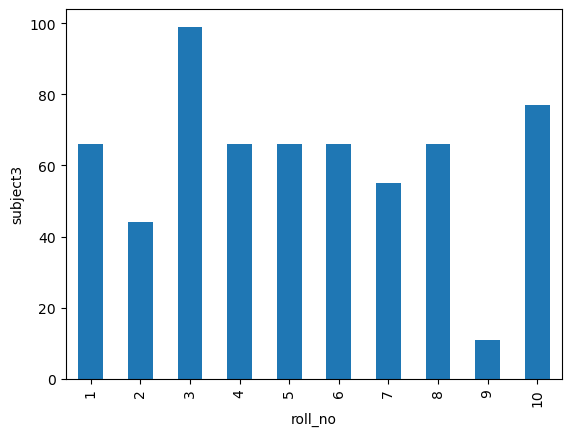

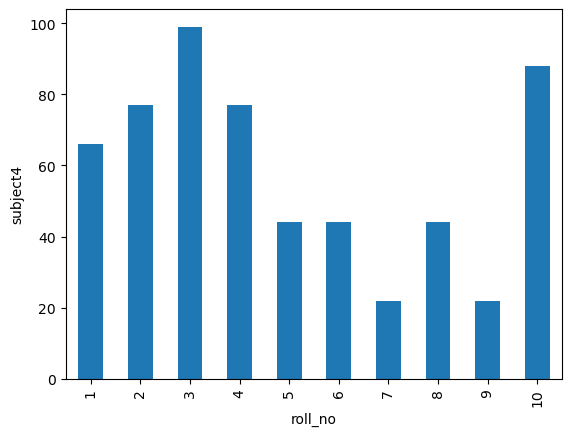

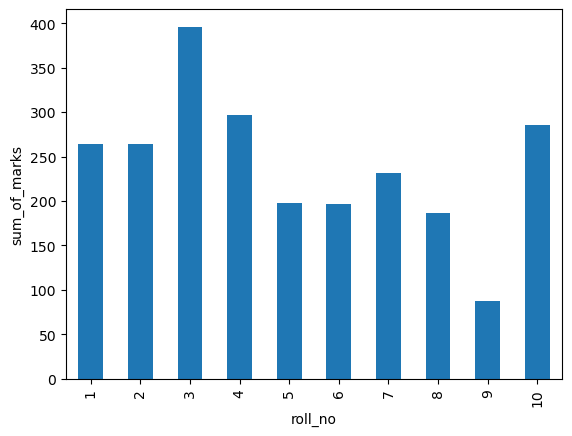

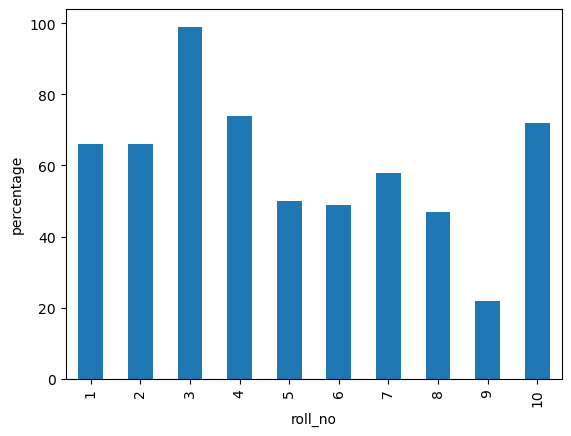

In [50]:
for feature in col_int:
    if feature!= 'roll_no':
        df.groupby('roll_no')[feature].median().plot.bar()
        plt.xlabel('roll_no')
        plt.ylabel(feature)
        plt.show()

In [55]:
rows_below_35 = df[(df['subject1']<35) | (df['subject2']<35) | (df['subject3']<35) | (df['subject4']<35)]

In [56]:
rows_below_35

,roll_no,first_name,last_name,subject1,subject2,subject3,subject4,sum_of_marks,percentage
5,6,alicia,schmidt,32,55,66,44,197,49
6,7,parvati,patil,88,66,55,22,231,58
7,8,percy,weasley,22,55,66,44,187,47
8,9,filch,nanw,22,33,11,22,88,22


In [63]:
df['Result'] = np.where((df[['subject1', 'subject2', 'subject3', 'subject4']] < 35).any(axis=1), 'Failed', 'Passed')

In [64]:
df

,roll_no,first_name,last_name,subject1,subject2,subject3,subject4,sum_of_marks,percentage,Result
0,1,Harry,Potter,66,66,66,66,264,66,Passed
1,2,Ron,Weasley,77,66,44,77,264,66,Passed
2,3,Hermione,Granger,99,99,99,99,396,99,Passed
3,4,Dean,Thomas,77,77,66,77,297,74,Passed
4,5,neville,longbottom,44,44,66,44,198,50,Passed
5,6,alicia,schmidt,32,55,66,44,197,49,Failed
6,7,parvati,patil,88,66,55,22,231,58,Failed
7,8,percy,weasley,22,55,66,44,187,47,Failed
8,9,filch,nanw,22,33,11,22,88,22,Failed
9,10,Draco,Malfoy,55,66,77,88,286,72,Passed
